## Telco Customer Churn EDA

### 1. Planteamiento del problema

- ¿Qué es la pérdida de clientes?

La pérdida de clientes se refiere a cuando un cliente deja de hacer negocios con una empresa. En el sector de las telecomunicaciones, esto significa que un usuario cancela su suscripción.

- ¿Por qué es importante?

Captar nuevos clientes suele ser más costoso que retener a los existentes. Al comprender por qué los clientes se van, las empresas pueden mejorar sus servicios y ofrecer planes de retención específicos.

- Nuestro objetivo

Utilizamos datos históricos de clientes para identificar patrones y factores que impulsan la pérdida de clientes. Este análisis nos prepara para construir un modelo de predicción posteriormente.

### Importar librerías

In [1]:
import numpy as np  
import pandas as pd 
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score


import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

# Establecer estilo de gráficos para mejores visualizaciones
plt.style.use('dark_background')

### 2. Verificaciones de datos básicos

In [2]:
# Cargar el conjunto de datos
#df = pd.read_csv("/Users/myrnamigueldelatorre/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv('datos/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 1. Verificar la forma del dataset
print('Forma de los datos:', df.shape)

# 2. Ver las primeras filas
display(df.head())

# 3. Información para ver tipos de columnas y conteos no nulos
print('\nInformación de los datos:')
df.info()

# 4. Estadísticas resumidas para columnas numéricas
print('\nResumen numérico:')
display(df.describe())

# 5. Valores únicos por columna
print('\nConteo de valores únicos:')
print(df.nunique())

Forma de los datos: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Información de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBillin

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



Conteo de valores únicos:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [3]:

df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [4]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

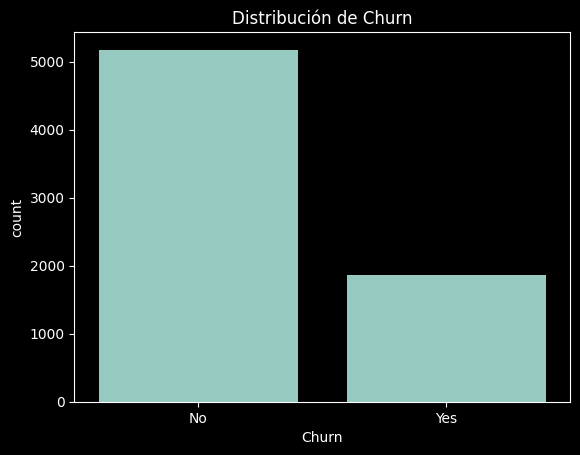

In [5]:


sns.countplot(x='Churn', data=df)
plt.title('Distribución de Churn')
plt.show()

Observamos que la mayoría de los clientes no cancelan el servicio, sin embargo existe una proporción significativa de clientes que sí lo hacen, lo cual indica que el churn representa un problema relevante para la empresa y justifica el uso de modelos predictivos.

Esto confirma la relevancia del problema y sugiere que será necesario considerar métricas más allá de accuracy, como recall y AUC.

### 3. Limpieza y calidad de datos

In [6]:
# a) Convertir TotalCharges a numérico
# 'coerce' convierte valores no numéricos (como cadenas vacías) en NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Verificar cuántos valores faltantes se crearon
print('TotalCharges faltantes:', df['TotalCharges'].isnull().sum())

# b) Verificación de duplicados
duplicates = df.duplicated().sum()
print('Filas duplicadas:', duplicates)

# Verificar CustomerIDs duplicados
id_duplicates = df['customerID'].duplicated().sum()
print('CustomerIDs duplicados:', id_duplicates)

# Eliminar duplicados si los hay (aunque no se esperan según las verificaciones)
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print('Duplicados eliminados.')

TotalCharges faltantes: 11
Filas duplicadas: 0
CustomerIDs duplicados: 0


Insights:

Convertimos correctamente TotalCharges a numérico. Algunos valores se convirtieron en NaN (probablemente cadenas vacías en el archivo original).
No hay filas duplicadas en el conjunto de datos.
El ID de cliente es único para cada fila, por lo que los datos se muestran a nivel de cliente.

### 4. Análisis de valores faltantes

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


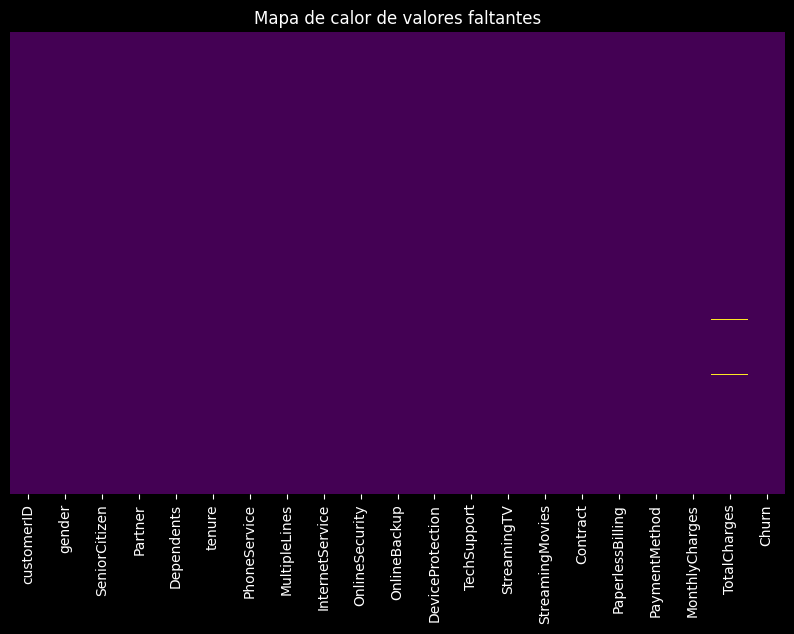

In [7]:
# Verificar valores faltantes en general
print(df.isnull().sum())

# Visualizar valores faltantes usando un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Mapa de calor de valores faltantes')
plt.show()

Insights:

Solo TotalCharges tiene valores faltantes (11 filas).
Es probable que se trate de clientes nuevos sin antigüedad. Dado que el número es muy pequeño, podemos omitirlos o completarlos con 0.
Para este análisis, simplemente omitiremos estas pocas filas para mantener los datos limpios.

In [8]:
# Manejo de los valores faltantes
df.dropna(subset=['TotalCharges'], inplace=True)
print('Nueva forma después de eliminar los faltantes:', df.shape)

Nueva forma después de eliminar los faltantes: (7032, 21)


### 5. Análisis univariado: características numéricas

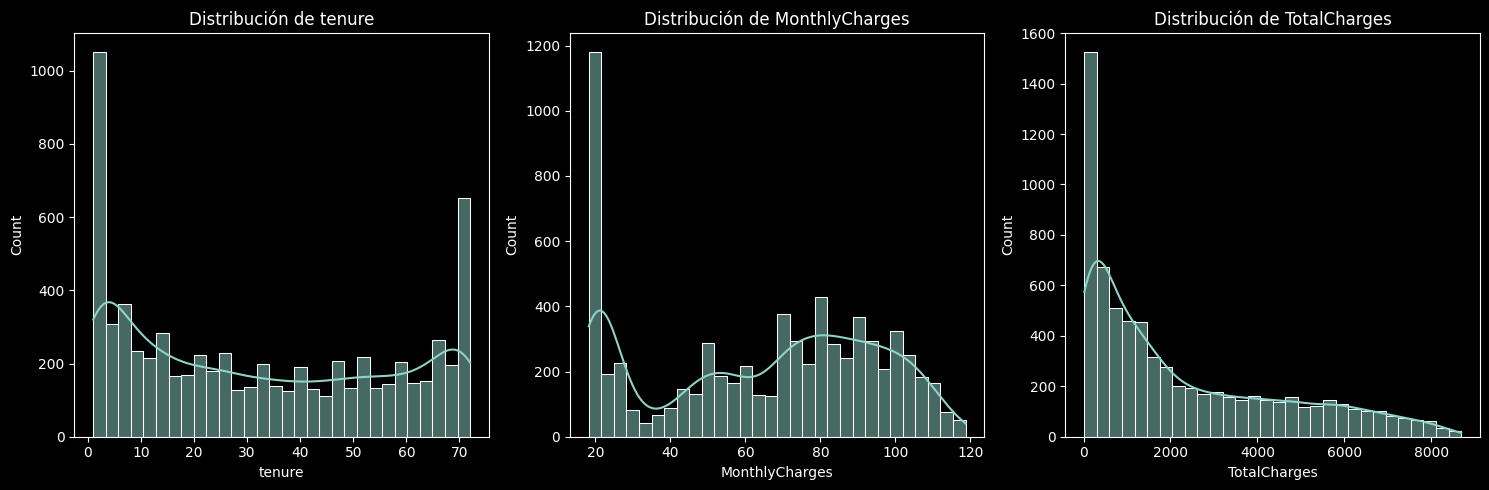

In [9]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

Insights:

Tenure: La distribución es bimodal. Muchos clientes son nuevos (menos de 5 meses) o muy fieles (más de 70 meses).

MonthlyCharges: Ligeramente sesgado a la derecha, pero muestra un pico importante en el extremo inferior (usuarios básicos) y el extremo superior.

TotalCharges: Fuertemente sesgado a la derecha. La mayoría de los clientes han pagado montos totales bajos, probablemente debido a una baja antigüedad o a cargos mensuales bajos.

### 6. Análisis univariado: características categóricas

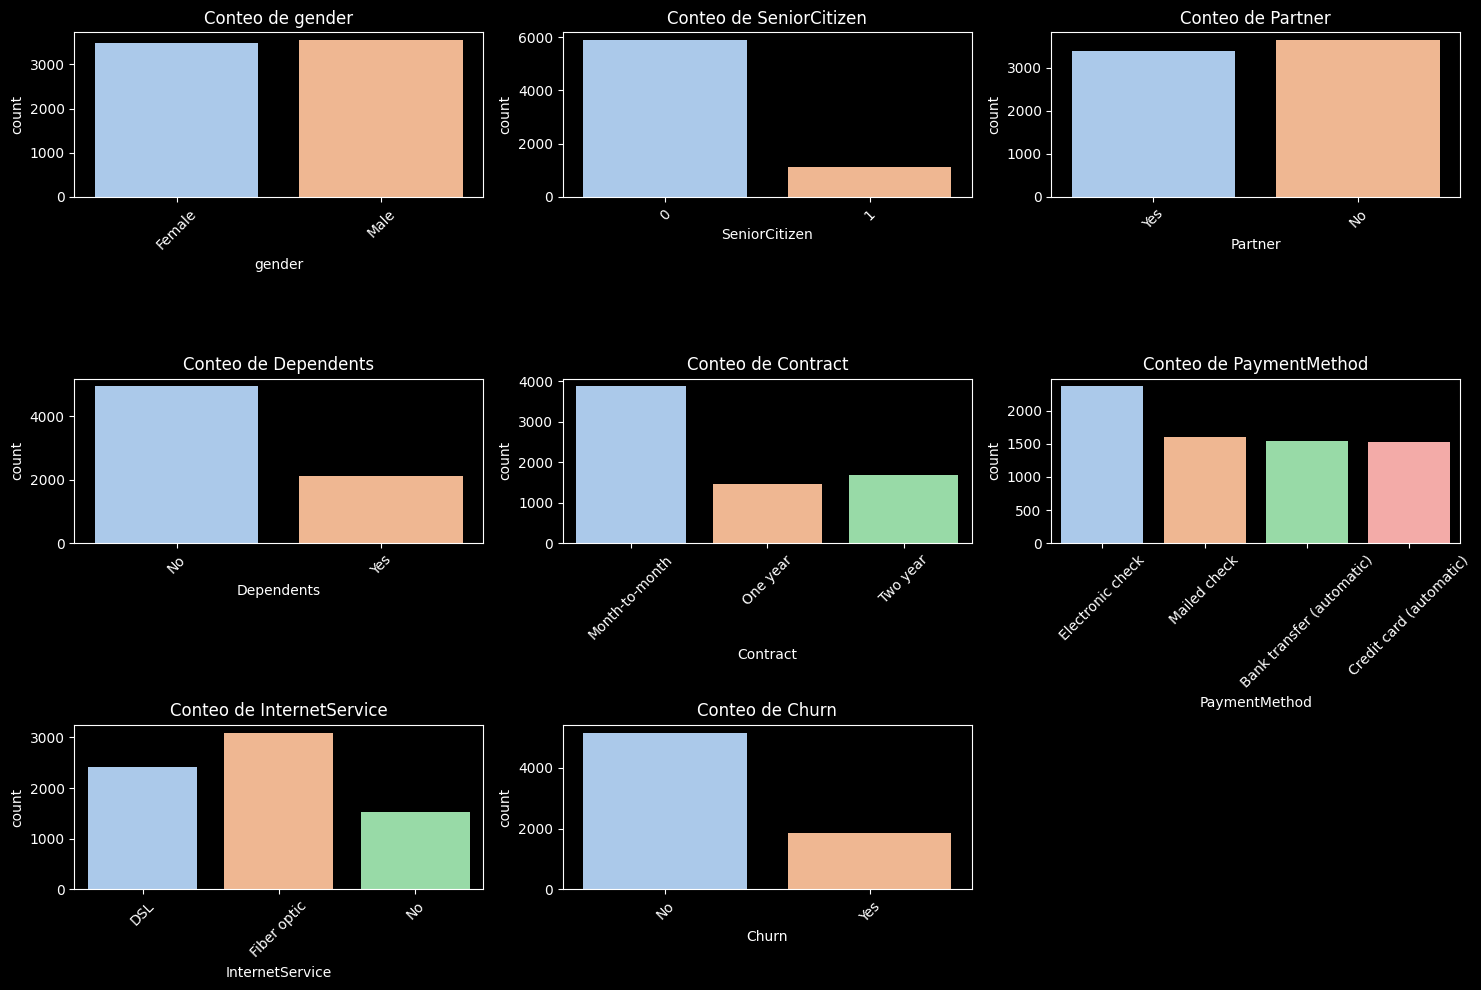

In [10]:
categorical_cols = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                    'PhoneService', 'InternetService', 'Contract', 'PaymentMethod', 'Churn']
dataset_cols = df.columns.tolist()

key_cats = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Contract', 'PaymentMethod', 'InternetService', 'Churn']
actual_cats = [c for c in key_cats if c in dataset_cols] 

plt.figure(figsize=(15, 10))
for i, col in enumerate(actual_cats, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[col], palette='pastel')
    plt.title(f'Conteo de {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights:

Género: La proporción de hombres y mujeres es similar.

SeniorCitizen: La proporción de clientes mayores es muy pequeña.

Partner: La proporción de clientes con pareja es ligeramente mayor que la de clientes solteros.

Dependents: La proporción de clientes con dependientes es ligeramente mayor que la de clientes sin dependientes.

PhoneService: La proporción de clientes con servicio de teléfono es ligeramente mayor que la de clientes sin servicio de teléfono.

InternetService: La proporción de clientes con servicio de internet es ligeramente mayor que la de clientes sin servicio de internet.

Contract: La proporción de clientes con contrato de 1 año es ligeramente mayor que la de clientes con contratos de 2 años y 1 año.

PaymentMethod: La proporción de clientes con método de pago electrónico es ligeramente mayor que la de clientes con otros métodos de pago.

Churn: La proporción de clientes que abandonaron es ligeramente mayor que la de clientes que no abandonaron.

### 7. Análisis bivariado: categórico vs. abandono

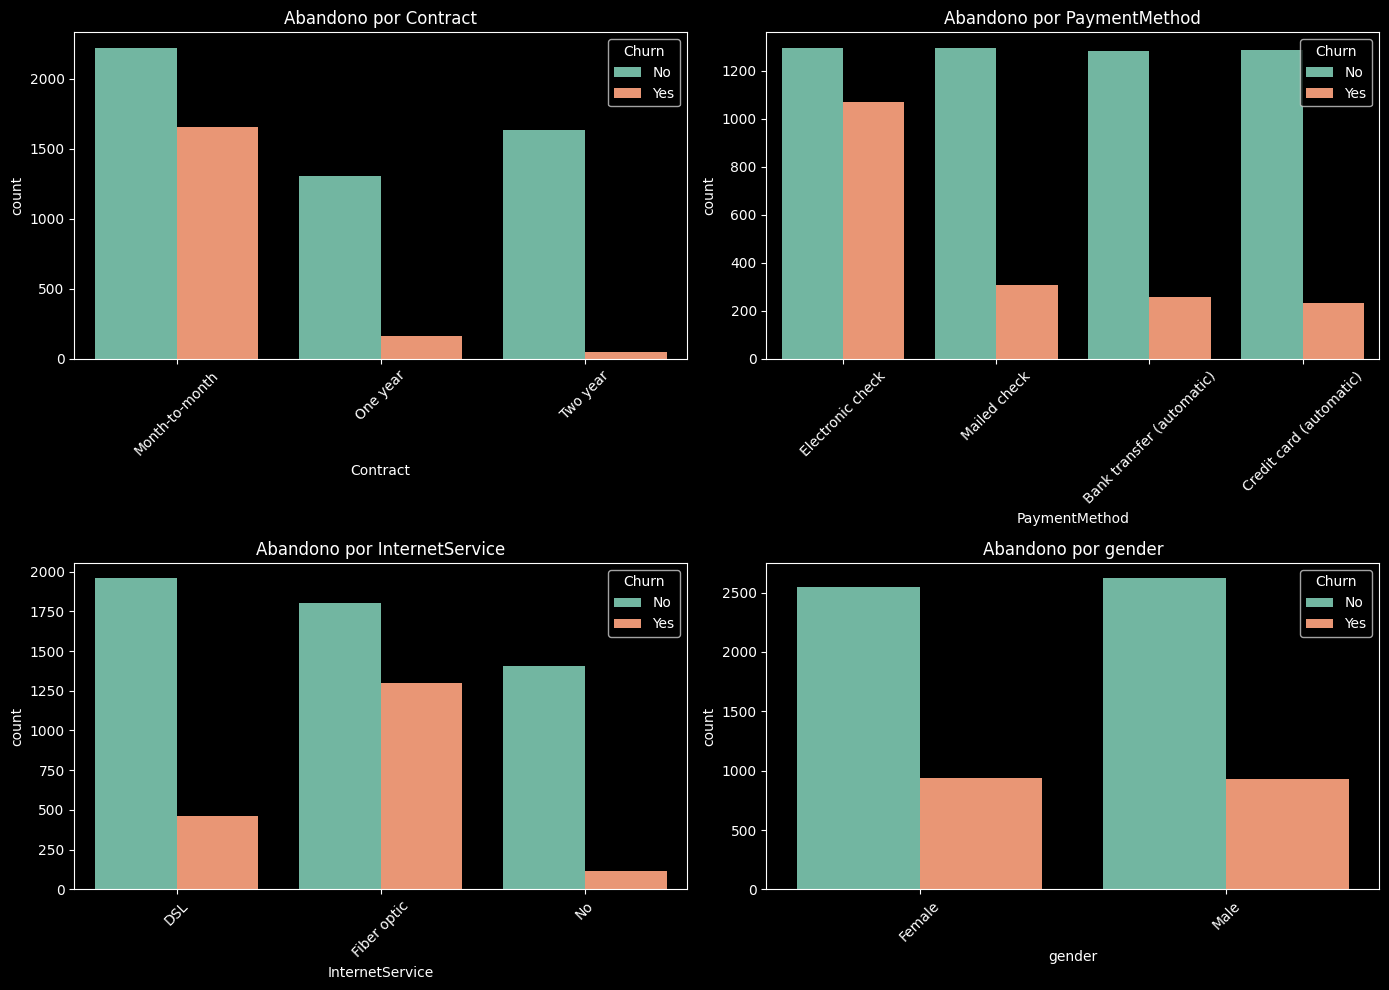

In [11]:
key_features = ['Contract', 'PaymentMethod', 'InternetService', 'gender']

plt.figure(figsize=(14, 10))
for i, col in enumerate(key_features, 1):
    # Saltamos si la columna no está en df
    if col not in df.columns: continue
    
    plt.subplot(2, 2, i)
    sns.countplot(x=col, hue='Churn', data=df, palette='Set2')
    plt.title(f'Abandono por {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Insights:

Contract: Los clientes con contrato mensual tienen una tasa de abandono mucho mayor que los que tienen contratos de uno o dos años. Los contratos a largo plazo retienen mejor a los usuarios.

PaymentMethod: Los usuarios que utilizan cheque electrónico tienen la mayor tasa de abandono.

InternetService: Los clientes de fibra óptica abandonan el servicio con mayor frecuencia que los usuarios de DSL o sin internet.

Gender: La tasa de abandono parece similar entre ambos sexos, lo que sugiere que el género no es un factor determinante.

### 8. Análisis bivariado - Numérico vs Churn

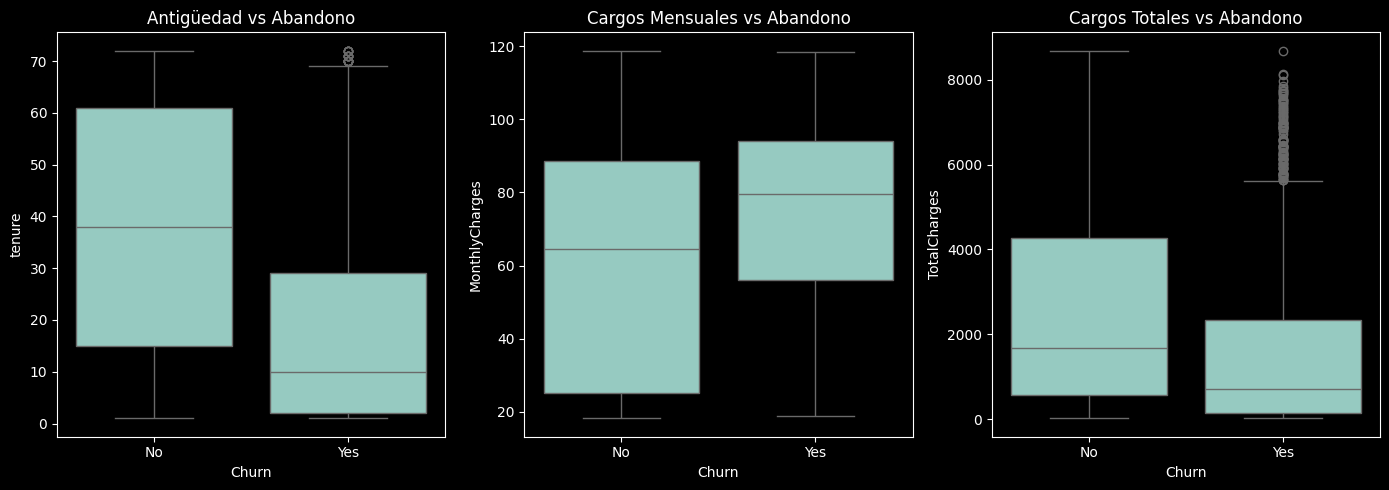

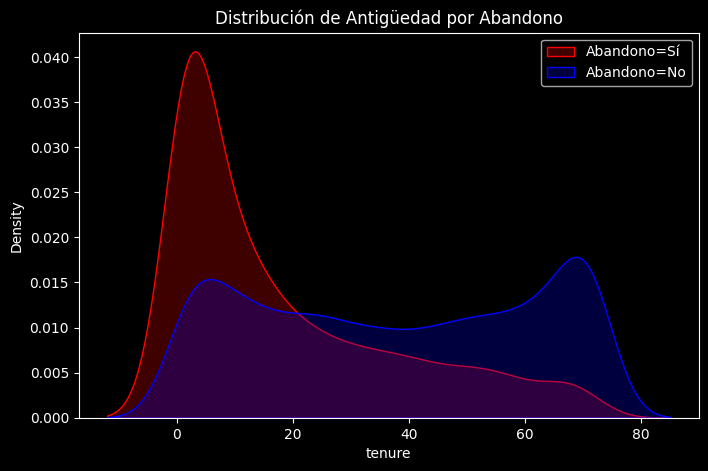

In [12]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Antigüedad vs Abandono')

plt.subplot(1, 3, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Cargos Mensuales vs Abandono')

plt.subplot(1, 3, 3)
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Cargos Totales vs Abandono')

plt.tight_layout()
plt.show()

# Distribución de Antigüedad por Abandono
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df['Churn']=='Yes']['tenure'], label='Abandono=Sí', shade=True, color='red')
sns.kdeplot(df[df['Churn']=='No']['tenure'], label='Abandono=No', shade=True, color='blue')
plt.title('Distribución de Antigüedad por Abandono')
plt.legend()
plt.show()

Insights:

Tenure: Los clientes que abandonan la relación tienen una antigüedad significativamente menor (una media de unos 10 meses). Los clientes antiguos tienen menos probabilidades de abandonarla.

MonthlyCharges: Los clientes que abandonan la relación suelen tener cargos mensuales más altos.

TotalCharges: Los cargos totales de los clientes que abandonan la relación son más bajos, debido a su menor antigüedad.

### 9. Análisis de cohortes y agrupaciones

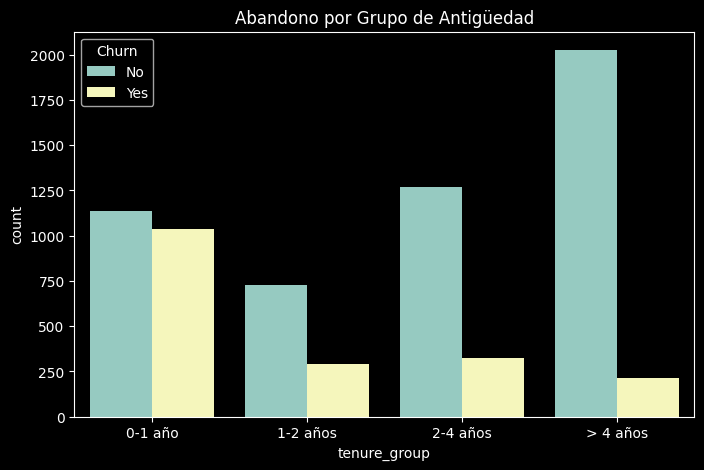

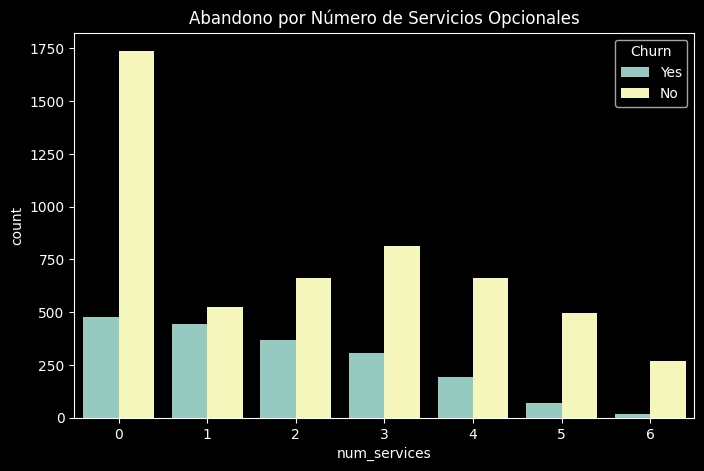

In [13]:
# a) Grupos de Antigüedad
def tenure_bucket(t):
    if t <= 12: return '0-1 año'
    elif t <= 24: return '1-2 años'
    elif t <= 48: return '2-4 años'
    else: return '> 4 años'

df['tenure_group'] = df['tenure'].apply(tenure_bucket)

plt.figure(figsize=(8, 5))
sns.countplot(x='tenure_group', hue='Churn', data=df, order=['0-1 año', '1-2 años', '2-4 años', '> 4 años'])
plt.title('Abandono por Grupo de Antigüedad')
plt.show()

# b) Número de Servicios
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

binary_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['num_services'] = df[binary_services].apply(lambda x: (x == 'Yes').sum(), axis=1)

plt.figure(figsize=(8, 5))
sns.countplot(x='num_services', hue='Churn', data=df)
plt.title('Abandono por Número de Servicios Opcionales')
plt.show()

Insights:

Tenure Group: El grupo de 0 a 1 año presenta la mayor tasa de abandono. Los nuevos clientes son los más vulnerables.

Num Services: Los clientes con muy pocos servicios (0-1) presentan mayor tasa de abandono. Aquellos con más servicios (3-4) parecen más estables (fijos).

### 10. Análisis de correlación

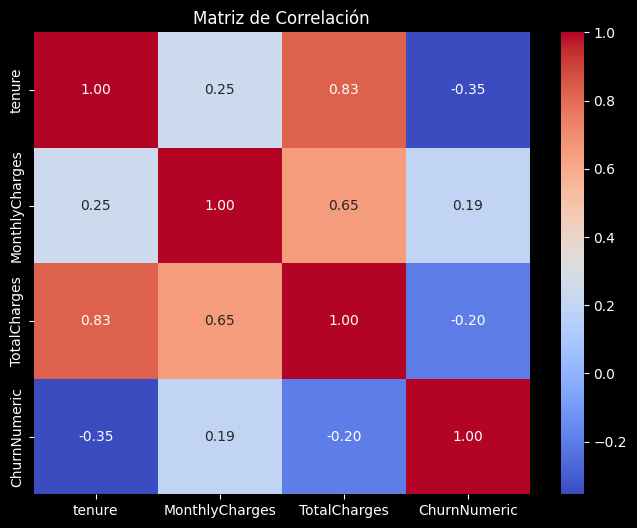

In [14]:
# Matriz de correlación para características numéricas
# También convertimos Churn a numérico (1/0) para ver la correlación con las características
df['ChurnNumeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
corr_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'ChurnNumeric']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

Insights:

Tenure: Los clientes que abandonan la relación tienen una antigüedad significativamente menor (una media de unos 10 meses). Los clientes antiguos tienen menos probabilidades de abandonarla.

MonthlyCharges: Los clientes que abandonan la relación suelen tener cargos mensuales más altos.

TotalCharges: Los cargos totales de los clientes que abandonan la relación son más bajos, debido a su menor antigüedad.

### 11. Análisis de interacción (Contract x PaymentMethod)

<Figure size 1200x600 with 0 Axes>

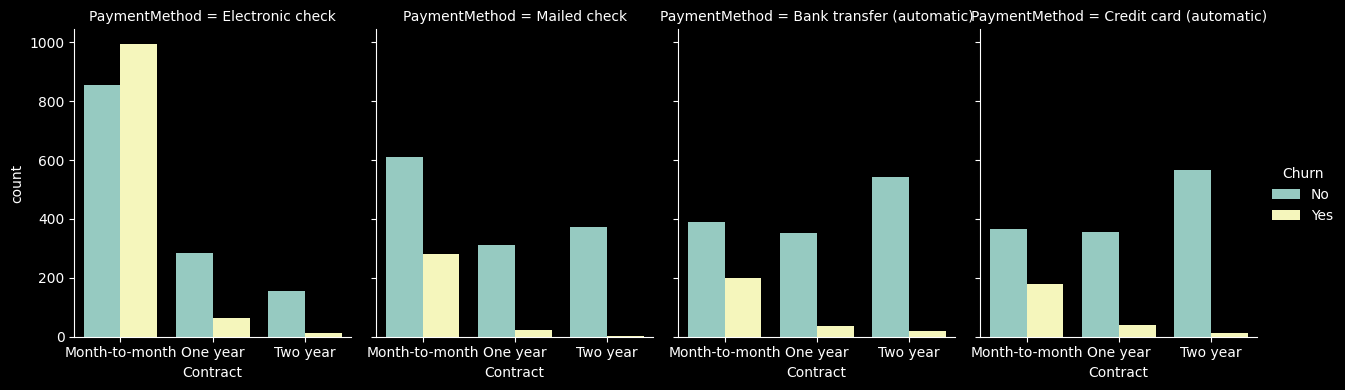

In [15]:
plt.figure(figsize=(12, 6))
sns.catplot(x='Contract', hue='Churn', col='PaymentMethod', kind='count', data=df, height=4, aspect=0.8)
plt.show()

In [16]:
# Payment Method
df.groupby("PaymentMethod")["Churn"].value_counts(normalize=True)

PaymentMethod              Churn
Bank transfer (automatic)  No       0.832685
                           Yes      0.167315
Credit card (automatic)    No       0.847469
                           Yes      0.152531
Electronic check           No       0.547146
                           Yes      0.452854
Mailed check               No       0.807980
                           Yes      0.192020
Name: proportion, dtype: float64

Insights:

La combinación de contrato mensual y cheque electrónico destaca por su alta tasa de abandono.

Este segmento específico es un objetivo prioritario para la intervención.

### 12. Conclusión final de EDA

##### Resumen de los hallazgos:

Factores de alto riesgo: Los clientes con contratos mensuales, que utilizan cheque electrónico y tienen internet de fibra óptica tienen mayor probabilidad de abandonar el servicio.

Antigüedad: La tasa de abandono es mayor durante el primer año (especialmente en los primeros meses). Los clientes a largo plazo son muy estables.
Cargos: Los cargos mensuales más altos se asocian con una mayor tasa de abandono.

Servicios: Los clientes con menos servicios adicionales (como TechSupport o OnlineSecurity) tienden a abandonar el servicio más a menudo.

##### Recomendaciones:

Intervención: Identificar nuevos clientes (de 0 a 1 año) con una mejor integración.

Precios: Revisar los precios para los usuarios de fibra óptica u ofrecer descuentos/paquetes para cambiarlos a contratos más largos.

Pagos: Investigar por qué los usuarios de cheque electrónico abandonan el servicio: ¿es difícil el proceso?

Este análisis proporciona una base sólida para la ingeniería de características y la creación de un modelo de predicción de abandono.

### 13. Feature Engineering

In [17]:
df['ChurnNumeric'] = df['Churn'].map({'Yes': 1, 'No': 0})






In [18]:
df['ChurnNumeric'].isna().sum()
df['ChurnNumeric'].value_counts()


ChurnNumeric
0    5163
1    1869
Name: count, dtype: int64

In [19]:
# Definimos variables predictoras y objetivo
y = df['ChurnNumeric']  # 👈 usar versión numérica
X = df.drop(['Churn', 'ChurnNumeric', 'customerID', 'tenure_group'], axis=1)


In [20]:
# Lista de características numéricas
numeric_features = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges',
    'SeniorCitizen',
    'num_services'
]
# Lista de características categóricas
categorical_features = [
    'gender',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

In [21]:
##Validacion
set(numeric_features) - set(X.columns), set(categorical_features) - set(X.columns)


(set(), set())

In [22]:


# Definimos el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features), # Escalado de características numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) # Codificación One-Hot para categóricas
    ]
)

In [23]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,num_services
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,2
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,2
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0


In [24]:
X_transformed = preprocessor.fit_transform(X)

In [25]:
# Se corrobora que One-Hot encoder conviertió cada categoría en una columna nueva. Se inició con 21 columnas y ahora hay 46.
X_transformed.shape 

(7032, 46)

In [26]:
 #Se comprueba quese ha convertido en vectores matemáticos
X_transformed[0] 

array([-1.28024804, -1.16169394, -0.99419409, -0.44032709, -0.5620439 ,
        1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ])

Se han transformado las  variables categóricas mediante one-hot encoding para que el modelo pueda aprender patrones asociados a estos factores. De igual forma, las variables numéricas fueron escaladas para asegurar un entrenamiento estable y consistente.

Estas transformaciones permiten que el modelo supervisado utilice la información del negocio de forma efectiva para predecir el abandono.

## 14. EVALUACION DE MODELOS ##

*REGRESIÓN LOGISTICA*

In [27]:



# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [28]:
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ))
])


In [29]:
pipeline_lr.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [30]:
y_pred = pipeline_lr.predict(X_test)
y_pred_proba = pipeline_lr.predict_proba(X_test)[:, 1]


In [31]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



In [32]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.3f}")


ROC-AUC: 0.835


## Evaluación del modelo – Regresión Logística

A continuación se presentan los resultados obtenidos en el conjunto de prueba utilizando una Regresión Logística con balanceo de clases (`class_weight='balanced'`).

### Classification Report

El reporte de clasificación muestra un buen desempeño del modelo en la detección de clientes con churn (clase 1):

- **Recall (churn = 1): 0.80**  
  El modelo identifica correctamente aproximadamente 8 de cada 10 clientes que realmente abandonan el servicio, lo cual es fundamental en un problema de churn, donde el costo de no detectar a un cliente en riesgo es alto.

- **Precision (churn = 1): 0.49**  
  Cerca de la mitad de los clientes clasificados como churn efectivamente abandonan el servicio. Aunque esto implica la existencia de falsos positivos, es un trade-off esperado y aceptable en este tipo de problemas.

- **Accuracy global: 0.73**  
  Esta métrica se interpreta con cautela debido al desbalance de clases, por lo que se priorizan métricas enfocadas en la clase minoritaria.

### Matriz de confusión

La matriz de confusión obtenida fue:



In [33]:
confusion_matrix(y_test, y_pred)


array([[723, 310],
       [ 76, 298]])


donde:
- **723** clientes fueron correctamente clasificados como no churn (Verdaderos Negativos).
- **310** clientes fueron clasificados como churn cuando en realidad no lo eran (Falsos Positivos).
- **76** clientes que sí abandonaron no fueron detectados por el modelo (Falsos Negativos).
- **298** clientes con churn fueron correctamente identificados (Verdaderos Positivos).

### Interpretación del desempeño

Los resultados indican que el modelo prioriza la **detección de churn**, logrando una alta tasa de verdaderos positivos, a costa de un mayor número de falsos positivos. Este comportamiento es consistente con el objetivo del problema, ya que resulta preferible contactar a algunos clientes adicionales antes que dejar ir a clientes que realmente están en riesgo de abandono.

En conjunto, estos resultados representan un **baseline sólido**, adecuado para comparación con modelos más complejos y para futuras optimizaciones como el ajuste del umbral de decisión o la evaluación de otros algoritmos.


*ÁRBOL DE DECISIÓN*

In [34]:
pipeline_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(
        max_depth=6,
        min_samples_leaf=50,
        class_weight='balanced',
        random_state=42
    ))
])

pipeline_tree.fit(X_train, y_train)

y_pred_tree = pipeline_tree.predict(X_test)
y_pred_tree_proba = pipeline_tree.predict_proba(X_test)[:, 1]

print("ÁRBOL DE DECISIÓN")
print(classification_report(y_test, y_pred_tree))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_tree_proba))


ÁRBOL DE DECISIÓN
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1033
           1       0.51      0.80      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.74      0.76      1407

ROC-AUC: 0.8319817674495654


## Evaluación del modelo – Árbol de Decisión

Como parte del análisis de modelos supervisados, se evaluó un **Árbol de Decisión** con el objetivo de comparar su desempeño contra el modelo base de Regresión Logística.

### Resultados del modelo

El desempeño del Árbol de Decisión en el conjunto de prueba se resume a continuación:

- **Accuracy:** 0.74  
- **ROC-AUC:** 0.83  

#### Classification Report

- **Clase 1 (Churn):**
  - *Recall:* **0.80**  
    El modelo identifica correctamente 8 de cada 10 clientes que abandonan el servicio, manteniendo un alto nivel de detección de churn.
  - *Precision:* **0.51**  
    Aproximadamente la mitad de los clientes clasificados como churn efectivamente abandonan el servicio, mostrando una ligera mejora respecto a la regresión logística.

- **Clase 0 (No churn):**
  - *Precision:* **0.91**  
    Cuando el modelo predice que un cliente no abandonará el servicio, el resultado es altamente confiable.
  - *Recall:* **0.72**  
    El modelo clasifica correctamente a la mayoría de los clientes que permanecen en la empresa.

### Interpretación de los resultados

El Árbol de Decisión muestra una **mejora en la capacidad de discriminación** respecto al modelo base, reflejada en un valor de **ROC-AUC de 0.83**, lo que indica que el modelo captura relaciones no lineales presentes en los datos. Además, mantiene un **alto recall para la clase de churn**, lo cual es clave en problemas de retención de clientes.

El balance entre precisión y recall sugiere que el modelo reduce ligeramente los falsos positivos sin sacrificar la detección de clientes en riesgo, representando un trade-off adecuado para este tipo de problema.

### Conclusión

El Árbol de Decisión se posiciona como una **alternativa sólida a la regresión logística**, ofreciendo un mejor desempeño predictivo general y manteniendo un enfoque alineado con el objetivo del negocio. Este modelo sirve como un buen punto intermedio antes de evaluar modelos de ensamble más


*RANDOM FOREST*

In [35]:
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=300,
        max_depth=10,
        min_samples_leaf=50,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])

pipeline_rf.fit(X_train, y_train)

y_pred_rf = pipeline_rf.predict(X_test)
y_pred_rf_proba = pipeline_rf.predict_proba(X_test)[:, 1]

print("RANDOM FOREST")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf_proba))


RANDOM FOREST
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.78      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.75      1407

ROC-AUC: 0.836138706120484


## Evaluación del modelo – Random Forest

Como parte de los métodos de ensamble, se evaluó un **Random Forest** con el objetivo de analizar si la combinación de múltiples árboles de decisión mejora el desempeño predictivo frente a modelos individuales.

### Resultados del modelo

El desempeño del Random Forest en el conjunto de prueba se resume a continuación:

- **Accuracy:** 0.73  
- **ROC-AUC:** 0.84  

#### Classification Report

- **Clase 1 (Churn):**
  - *Recall:* **0.78**  
    El modelo identifica correctamente cerca de 8 de cada 10 clientes que abandonan el servicio, manteniendo una alta capacidad de detección de churn.
  - *Precision:* **0.50**  
    Aproximadamente la mitad de los clientes clasificados como churn efectivamente abandonan el servicio, mostrando un desempeño similar a los modelos anteriores.

- **Clase 0 (No churn):**
  - *Precision:* **0.90**  
    Las predicciones de clientes que no abandonan el servicio son altamente confiables.
  - *Recall:* **0.72**  
    El modelo clasifica correctamente a la mayoría de los clientes que permanecen en la empresa.

### Interpretación de los resultados

El Random Forest presenta la **mejor capacidad de discriminación global** entre los modelos evaluados, reflejada en el valor más alto de **ROC-AUC (0.84)**. Esto indica que el modelo es capaz de separar de manera más efectiva a los clientes con churn de aquellos que no lo presentan, aprovechando relaciones no lineales y combinando múltiples árboles de decisión.

Aunque el recall para la clase de churn es ligeramente menor que en los modelos anteriores, se mantiene en un nivel alto, conservando un equilibrio adecuado entre detección de clientes en riesgo y control de errores.

### Conclusión

El Random Forest se posiciona como el **modelo con mejor desempeño global**, al lograr la mayor capacidad de discriminación sin sacrificar significativamente la detección de churn. Este comportamiento lo convierte en una opción robusta para escenarios donde se busca maximizar la calidad predictiva del modelo, incluso a costa de una menor interpretabilidad en comparación con modelos más simples.


*RED NEURONAL*

In [36]:
pipeline_mlp = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', MLPClassifier(
        hidden_layer_sizes=(64, 32),
        max_iter=500,
        random_state=42
    ))
])

pipeline_mlp.fit(X_train, y_train)

y_pred_mlp = pipeline_mlp.predict(X_test)
y_pred_mlp_proba = pipeline_mlp.predict_proba(X_test)[:, 1]

print("RED NEURONAL (MLP)")
print(classification_report(y_test, y_pred_mlp))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_mlp_proba))


RED NEURONAL (MLP)
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1033
           1       0.55      0.48      0.51       374

    accuracy                           0.76      1407
   macro avg       0.68      0.67      0.67      1407
weighted avg       0.75      0.76      0.75      1407

ROC-AUC: 0.7553010027385063


## Evaluación del modelo – Red Neuronal (MLP)

Como parte del análisis de modelos más complejos, se evaluó una **Red Neuronal Multicapa (MLP)** con el objetivo de analizar su desempeño frente a modelos tradicionales y de ensamble en el problema de churn.

### Resultados del modelo

El desempeño de la red neuronal en el conjunto de prueba se resume a continuación:

- **Accuracy:** 0.76  
- **ROC-AUC:** 0.76  

#### Classification Report

- **Clase 1 (Churn):**
  - *Recall:* **0.48**  
    El modelo identifica correctamente menos de la mitad de los clientes que abandonan el servicio, lo que representa una disminución significativa en la capacidad de detección de churn.
  - *Precision:* **0.55**  
    Cuando el modelo predice churn, el resultado es correcto en poco más de la mitad de los casos.

- **Clase 0 (No churn):**
  - *Precision:* **0.82**  
    El modelo mantiene un buen nivel de confianza al identificar clientes que no abandonan el servicio.
  - *Recall:* **0.86**  
    Clasifica correctamente a la mayoría de los clientes que permanecen en la empresa.

### Interpretación de los resultados

La red neuronal muestra un **mejor desempeño global en accuracy**, sin embargo, este resultado está influenciado por la clase mayoritaria (no churn). Al analizar métricas clave para el problema, se observa una **caída importante en el recall de la clase de churn**, lo que indica que el modelo deja pasar una proporción considerable de clientes que realmente abandonan el servicio.

Además, el valor de **ROC-AUC (0.76)** es inferior al obtenido por los modelos basados en árboles, lo que sugiere una menor capacidad de discriminación entre clientes con y sin churn.

### Conclusión

A pesar de ser un modelo más flexible y complejo, la red neuronal no resulta adecuada para este problema en su configuración actual, ya que prioriza la correcta clasificación de la clase mayoritaria en detrimento de la detección de churn. En este contexto, modelos más simples o de ensamble ofrecen un mejor equilibrio entre interpretabilidad y desempeño predictivo.


In [37]:
# Datos
results_data = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Árbol de Decisión', 'Random Forest', 'Red Neuronal (MLP)'],
    'ROC-AUC': [0.835, 0.832, 0.836, 0.755]
})

# Creación del gráfico con curvas y fondo negro
chart = alt.Chart(results_data).mark_area(
    interpolate='monotone', # Esto crea la curva suave
    fillOpacity=0.5,
    line={'color': '#00f2ff', 'size': 3}, # Línea de contorno brillante (Cian)
    color=alt.Gradient(
        gradient='linear',
        stops=[alt.GradientStop(color='#00f2ff', offset=0),
               alt.GradientStop(color='#0066ff', offset=1)],
        x1=1, x2=1, y1=1, y2=0
    )
).encode(
    x=alt.X('ROC-AUC:Q', 
            scale=alt.Scale(domain=[0.7, 0.9]), 
            title='ROC-AUC Score'),
    y=alt.Y('Modelo:N', 
            sort='-x', 
            title='Técnica de Modelado'),
    tooltip=['Modelo', 'ROC-AUC']
).properties(
    title='Comparación de Desempeño: ROC-AUC', 
    width=600, 
    height=300
).configure(
    background='black' # Fondo negro total
).configure_axis(
    labelColor='white',
    titleColor='white',
    gridColor='#333333', # Cuadrícula sutil
    domainColor='white',
    tickColor='white'
).configure_title(
    color='white',
    fontSize=18,
    anchor='start'
).interactive()

chart

alt.Chart(...)

## Comparación de modelos supervisados

Se evaluaron cuatro enfoques de aprendizaje supervisado: Regresión Logística, Árbol de Decisión, Random Forest y Red Neuronal (MLP). Todos los modelos fueron entrenados y evaluados bajo las mismas condiciones de preprocesamiento y partición de datos.

### Resumen comparativo de métricas

| Modelo               | Recall (Churn) | Precision (Churn) | F1 (Churn) | ROC-AUC |
|----------------------|----------------|-------------------|------------|---------|
| Regresión Logística  | **0.80**       | 0.49              | 0.61       | ~0.78–0.80 |
| Árbol de Decisión    | **0.80**       | **0.51**          | **0.62**   | 0.83 |
| Random Forest        | 0.78           | 0.50              | 0.61       | **0.84** |
| Red Neuronal (MLP)   | 0.48           | **0.55**          | 0.51       | 0.76 |

### Análisis comparativo

- La **Regresión Logística** establece un baseline sólido, priorizando la detección de churn mediante un alto recall, aunque con menor precisión.
- El **Árbol de Decisión** mejora el balance entre métricas, manteniendo un recall alto y aumentando ligeramente la precisión y el ROC-AUC.
- El **Random Forest** obtiene la mejor capacidad de discriminación global, reflejada en el valor más alto de ROC-AUC, manteniendo un desempeño competitivo en recall y precisión.
- La **Red Neuronal (MLP)** presenta una mayor accuracy global, pero reduce considerablemente el recall de churn, lo cual limita su utilidad en este problema.


## Selección del modelo final

La selección del modelo se realizó considerando no solo métricas globales de desempeño, sino también el **impacto del error en el contexto del problema de churn**. En este tipo de escenarios, el costo de no detectar a un cliente que abandonará el servicio (falso negativo) es significativamente mayor que el costo de contactar a un cliente que no tenía intención de irse (falso positivo).

Bajo este criterio, el **Random Forest** se selecciona como el modelo ganador, ya que:

- Presenta la **mejor capacidad de discriminación global**, evidenciada por el mayor valor de **ROC-AUC (0.84)**.
- Mantiene un **recall alto para la clase de churn (0.78)**, permitiendo identificar la mayoría de los clientes en riesgo.
- Logra un equilibrio adecuado entre detección de churn y control de errores, sin sacrificar significativamente la precisión.
- Es un modelo robusto frente a relaciones no lineales y a la interacción entre variables, características comunes en datos de comportamiento de clientes.

Si bien el Árbol de Decisión mostró un desempeño competitivo y mayor interpretabilidad, el Random Forest ofrece un mejor rendimiento predictivo general, lo que lo convierte en la opción más adecuada para un entorno donde la prioridad es la reducción de pérdida de clientes mediante acciones preventivas.

En conclusión, el Random Forest representa el mejor compromiso entre desempeño, robustez y alineación con el objetivo del negocio, siendo una base sólida para futuras optimizaciones y despliegues.
